In [121]:
import os

In [122]:
path = "/Users/apoorvgarg/Downloads/Coding/machine-learning-online-2018/Datasets/Images/Images"

In [57]:
folders = os.listdir(path)

In [58]:
for f in folders:
    if f == '.DS_Store': continue
    f_path = path+'/'+f
    print(len(os.listdir(f_path)))

202
202
202
202


In [59]:
from matplotlib import pyplot as plt
from keras.preprocessing import image

In [60]:
sample_path = path+'/cats/cat.1.jpg'
img = image.load_img(sample_path)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [61]:
x = image.img_to_array(img)/255

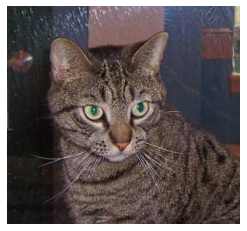

In [62]:
plt.imshow(x)
plt.axis('off')
plt.show()

In [63]:

from keras.layers import  *
from keras.models import Sequential

In [64]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))  # 10 outputs in MNIST dataset

In [65]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

In [66]:
from keras import optimizers
import tensorflow as tf

In [67]:
adam = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

In [68]:
# model.fit() # useful when data set is small and it can fit inside the summary

In [69]:
from keras.preprocessing.image import ImageDataGenerator

In [136]:
train_gen = ImageDataGenerator(rescale=1.0/255)
val_gen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_gen.flow_from_directory(
    path+'/',
    target_size= (150,150),
    batch_size=32,
    class_mode='categorical'
)
val_generator = val_gen.flow_from_directory(
    xx+'/',
    target_size= (150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 724 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [71]:
# train_generator.labels

In [72]:
#Verify
for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    break

(32, 150, 150, 3)
(32, 4)


In [137]:
#Train our model
history = model.fit_generator(
    train_generator,
    epochs= 20,
    steps_per_epoch = 7,
    validation_data= val_generator

)

Epoch 1/20
7/7 [==============================] - 4s 503ms/step - loss: 0.9216 - acc: 0.6116 - val_loss: 0.9500 - val_acc: 0.6190
Epoch 2/20
7/7 [==============================] - 3s 437ms/step - loss: 1.0721 - acc: 0.5491 - val_loss: 0.9306 - val_acc: 0.6905

In [74]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.plot(acc,label='accuracy')
plt.plot(val_acc,label='val_acc')
plt.plot(loss,label="loss")
plt.plot(val_loss,label='val_loss')
plt.legend()
plt.show()

## How to create a validation set from Training set


In [123]:
import shutil

In [124]:
vpath = '/Users/apoorvgarg/Downloads/Coding/machine-learning-online-2018/Datasets/Images/'

In [125]:
folders = os.listdir(path)

In [126]:
if not os.path.isdir(vpath+"val_images"):
    os.mkdir(vpath+'val_images')
classes = ['dogs','cats','humans','horses']

In [131]:
xx = vpath+"val_images"
for c in classes:
    p = os.path.join(xx,c)
    if not os.path.isdir(p):
        os.mkdir(p)

In [132]:
print(os.listdir(vpath+'val_images'))

['dogs', 'cats', 'humans', 'horses']


In [133]:
split = 0.9

for f in os.listdir(path):
    if f == '.DS_Store': continue
    f_path = path + '/' + f
    imgs = os.listdir(f_path)

    split_size = int(split*len(imgs))
    files_to_move = imgs[split_size:]
    print(len(files_to_move))

    for img_f in files_to_move:
        src = os.path.join(f_path,img_f)
        dest = os.path.join(vpath+'val_images/'+f,img_f)
        shutil.move(src,dest)
        # print(src)
        # print(dest)

21
21
21
21


In [134]:
print("training data")
for f in folders:
    if f == '.DS_Store': continue
    print(f+ " "+str(len(os.listdir(path+'/'+f))))

training data
dogs 181
cats 181
humans 181
horses 181


In [135]:
print("validation data")
for f in folders:
    if f == '.DS_Store': continue
    print(f+ " "+str(len(os.listdir(vpath+'val_images/'+f))))

validation data
dogs 21
cats 21
humans 21
horses 21
